In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from datetime import datetime, timedelta


In [2]:
derecho911_df = pd.read_csv('../data/911_Phone_Calls_Derecho_050320_050420.csv')

In [3]:
tornado911_df = pd.read_csv('../data/911_Phone_Calls_Tornado_030320.csv')

In [4]:
derecho_incidents_df = pd.read_csv('../data/Computer_Aided_Dispatch_Data_Derecho_Incidents 050320_050420.csv', skiprows=3)

In [5]:
tornado_incidents_df = pd.read_csv('../data/Computer_Aided_Dispatch_Data_Tornado_Incidents_030320.csv',  skiprows=3)

In [6]:
single_family_housing_df = pd.read_csv('../data/2017_single_family_final_with_sqft.txt')

In [7]:
derecho911_df.head(5)

,Seizure DateTime,CallTypeId,ALI Latitude,ALI Longitude,Cell Tower Address
0,5/3/2020 16:30,911 Calls,36.247802,-86.716847,WIRELESS CALLER
1,5/3/2020 16:30,911 Calls,36.143108,-86.800621,1161 21ST AV S - SE
2,5/3/2020 16:30,911 Calls,36.100516,-87.056329,8013 C MCCRORY LN - N
3,5/3/2020 16:30,911 Calls,36.130021,-86.927819,5758 RIVER RD - SW
4,5/3/2020 16:31,911 Calls,36.142380,-86.881882,3744B ANNEX AVE - SE


In [8]:
derecho911_df['ALI Latitude'] = derecho911_df['ALI Latitude'].fillna(0)
derecho911_df['ALI Longitude'] = derecho911_df['ALI Longitude'].fillna(0)
##Turn NaNs into zeroes
derecho911_df['LatLong'] = derecho911_df.apply(lambda row: [row['ALI Latitude'], row['ALI Longitude']], axis=1)
##Make a latLong column which contains an array which is the form required for map markers
derecho911_df_map = folium.Map(location=[36.247802, -86.716847], zoom_start=12)
##This is an arbitrary location within Nashville to start; this could be more centered
folium.TileLayer('stamentoner').add_to(derecho911_df_map)
for location in derecho911_df['LatLong']:
    folium.Marker(location=location).add_to(derecho911_df_map)
derecho911_df_map

#### 7.  A comparison of the storm paths with areas of the community impacted by Covid today

In [9]:
derecho911_df['ALI Latitude'] = derecho911_df['ALI Latitude'].fillna(0)
derecho911_df['ALI Longitude'] = derecho911_df['ALI Longitude'].fillna(0)
##Turn NaNs into zeroes
derecho911_df['LatLong'] = derecho911_df.apply(lambda row: [row['ALI Latitude'], row['ALI Longitude']], axis=1)
##Make a latLong column which contains an array which is the form required for map markers
derecho911_df_clustered_map = folium.Map(location=[36.247802, -86.716847], zoom_start=12)
##This is an arbitrary location within Nashville to start; this could be more centered
#create a marker cluster
marker_cluster = MarkerCluster().add_to(derecho911_df_clustered_map)
for row_index, row_values in derecho911_df.iterrows():
    loc = [row_values['ALI Latitude'], row_values['ALI Longitude']]
    pop = str(row_values['Seizure DateTime'])
    marker = folium.Marker(
    location = loc, 
    popup = pop) 
    
    marker.add_to(marker_cluster)
    
derecho911_df_clustered_map

In [10]:
derecho911_df = pd.read_csv('../data/911_Phone_Calls_Derecho_050320_050420.csv')
tornado911_df = pd.read_csv('../data/911_Phone_Calls_Tornado_030320.csv')

In [11]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


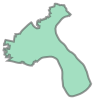

In [12]:
zipcodes.loc[0, 'geometry']

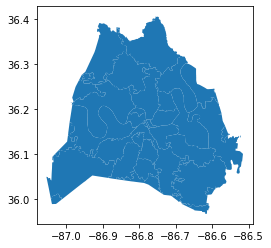

In [13]:
zipcodes.plot();

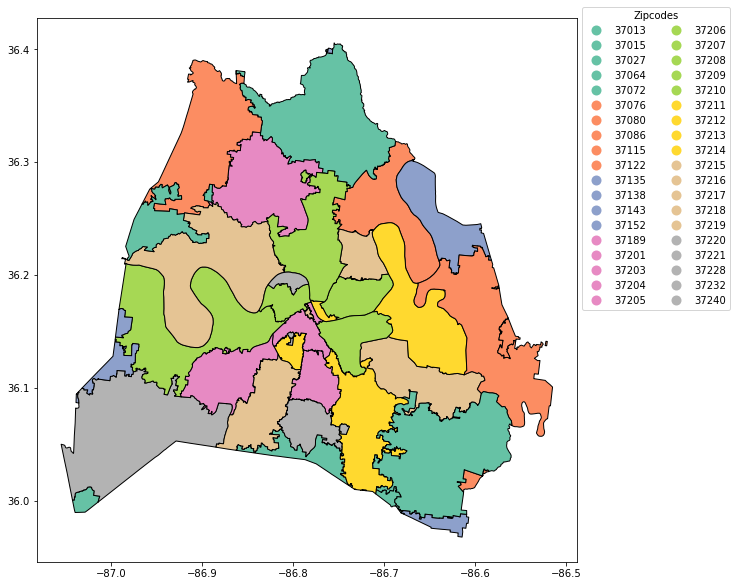

In [14]:

leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [15]:
derecho911_df['geometry'] = derecho911_df.apply(lambda x: Point((float(x['ALI Latitude']), 
                                                         float(x['ALI Longitude']))), 
                                        axis=1)
derecho911_df.head(3)

,Seizure DateTime,CallTypeId,ALI Latitude,ALI Longitude,Cell Tower Address,geometry
0,5/3/2020 16:30,911 Calls,36.247802,-86.716847,WIRELESS CALLER,POINT (36.247802 -86.716847)
1,5/3/2020 16:30,911 Calls,36.143108,-86.800621,1161 21ST AV S - SE,POINT (36.14310800000001 -86.80062099999999)
2,5/3/2020 16:30,911 Calls,36.100516,-87.056329,8013 C MCCRORY LN - N,POINT (36.100516 -87.05632900000001)


In [16]:
derecho911_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Seizure DateTime    1549 non-null   object 
 1   CallTypeId          1549 non-null   object 
 2   ALI Latitude        1483 non-null   float64
 3   ALI Longitude       1483 non-null   float64
 4   Cell Tower Address  1525 non-null   object 
 5   geometry            1549 non-null   object 
dtypes: float64(2), object(4)
memory usage: 72.7+ KB


In [17]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
zipcodes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   zip             56 non-null     object  
 1   objectid        56 non-null     object  
 2   po_name         56 non-null     object  
 3   shape_stlength  56 non-null     object  
 4   shape_starea    56 non-null     object  
 5   geometry        56 non-null     geometry
dtypes: geometry(1), object(5)
memory usage: 2.8+ KB


In [19]:
derecho911_geo = gpd.GeoDataFrame(derecho911_df, 
                           crs = zipcodes.crs, 
                           geometry = derecho911_df['geometry'])

In [20]:
derecho911_geo.head()

,Seizure DateTime,CallTypeId,ALI Latitude,ALI Longitude,Cell Tower Address,geometry
0,5/3/2020 16:30,911 Calls,36.247802,-86.716847,WIRELESS CALLER,POINT (36.24780 -86.71685)
1,5/3/2020 16:30,911 Calls,36.143108,-86.800621,1161 21ST AV S - SE,POINT (36.14311 -86.80062)
2,5/3/2020 16:30,911 Calls,36.100516,-87.056329,8013 C MCCRORY LN - N,POINT (36.10052 -87.05633)
3,5/3/2020 16:30,911 Calls,36.130021,-86.927819,5758 RIVER RD - SW,POINT (36.13002 -86.92782)
4,5/3/2020 16:31,911 Calls,36.142380,-86.881882,3744B ANNEX AVE - SE,POINT (36.14238 -86.88188)


In [21]:
type(derecho911_geo)

geopandas.geodataframe.GeoDataFrame

In [22]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [23]:
derecho911_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Seizure DateTime    1549 non-null   object  
 1   CallTypeId          1549 non-null   object  
 2   ALI Latitude        1483 non-null   float64 
 3   ALI Longitude       1483 non-null   float64 
 4   Cell Tower Address  1525 non-null   object  
 5   geometry            1549 non-null   geometry
dtypes: float64(2), geometry(1), object(3)
memory usage: 72.7+ KB


In [24]:
zipcodes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   zip       56 non-null     object  
 1   po_name   56 non-null     object  
 2   geometry  56 non-null     geometry
dtypes: geometry(1), object(2)
memory usage: 1.4+ KB


In [25]:
derecho911_by_zip = gpd.sjoin(derecho911_geo, zipcodes, op = 'within')

In [26]:
derecho911_by_zip.head()

,Seizure DateTime,CallTypeId,ALI Latitude,ALI Longitude,Cell Tower Address,geometry,index_right,zip,po_name
